# 20241122

 기존 zernike다항식을 사용하면 n-m = 홀수인 경우, ASML의 그림과 다름.
 ASML 수식으로 코드 수정함.
 

C:\Users\oth08\AppData\Local\Temp\ipykernel_30976\4022498938.py:10: RuntimeWarning: divide by zero encountered in divide
  coeff = 1 / (np.math.factorial(k) * u**m)
C:\Users\oth08\AppData\Local\Temp\ipykernel_30976\4022498938.py:11: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return coeff * derivative(func, u, n=k, dx=1e-6)
C:\Users\oth08\AppData\Local\Temp\ipykernel_30976\4022498938.py:16: RuntimeWarning: invalid value encountered in multiply
  return r**m * g_km(k, m, u)
C:\Users\oth08\AppData\Local\Temp\ipykernel_30976\4022498938.py:35: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  

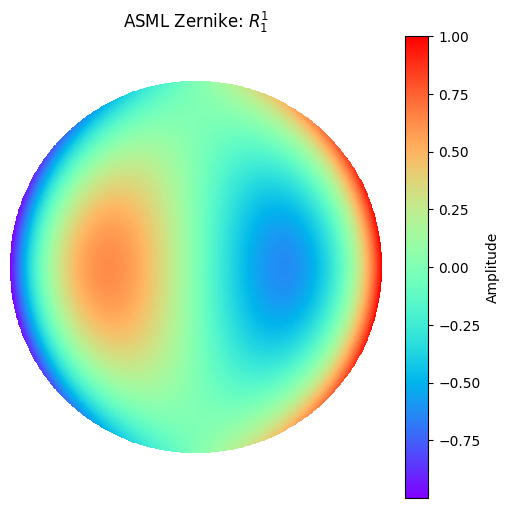

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# G_k^m(u) 계산
def g_km(k, m, u):
    def func(v):
        return v**(m + k) * (v - 1)**k
    
    coeff = 1 / (np.math.factorial(k) * u**m)
    return coeff * derivative(func, u, n=k, dx=1e-6)

# R_k^m(r) 계산
def r_km(k, m, r):
    u = r**2
    return r**m * g_km(k, m, u)

# Zernike polynomial
def zernike_asml(k, m, r, theta):
    R = r_km(k, abs(m), r)
    if m >= 0:
        return R * np.cos(m * theta)
    else:
        return R * np.sin(abs(m) * theta)

# 테스트: Zernike 다항식 시각화
def plot_zernike_asml(k, m):
    r, theta = np.linspace(0, 1, 500), np.linspace(0, 2 * np.pi, 500)
    r, theta = np.meshgrid(r, theta)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = zernike_asml(k, m, r, theta)

    plt.figure(figsize=(6, 6))
    plt.pcolormesh(x, y, z, shading='auto', cmap='rainbow')
    plt.title(f"ASML Zernike: $R_{{{k}}}^{{{m}}}$")
    plt.axis('equal')
    plt.axis('off')
    plt.colorbar(label="Amplitude")
    plt.show()

# 테스트 실행
plot_zernike_asml(k=1, m=1)


C:\Users\oth08\AppData\Local\Temp\ipykernel_27216\1578766561.py:10: RuntimeWarning: divide by zero encountered in divide
  coeff = 1 / (np.math.factorial(k) * u**m)
C:\Users\oth08\AppData\Local\Temp\ipykernel_27216\1578766561.py:11: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return coeff * derivative(func, u, n=k, dx=1e-6)
C:\Users\oth08\AppData\Local\Temp\ipykernel_27216\1578766561.py:16: RuntimeWarning: invalid value encountered in multiply
  return r**m * g_km(k, m, u)
C:\Users\oth08\AppData\Local\Temp\ipykernel_27216\1578766561.py:35: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  

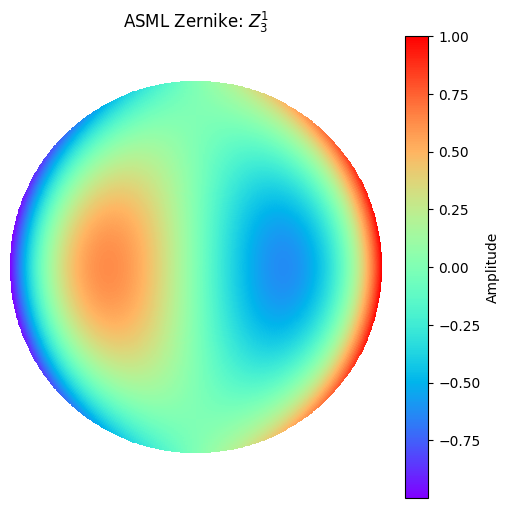

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# G_k^m(u) 계산
def g_km(k, m, u):
    def func(v):
        return v**(m + k) * (v - 1)**k
    
    coeff = 1 / (np.math.factorial(k) * u**m)
    return coeff * derivative(func, u, n=k, dx=1e-6)

# R_k^m(r) 계산
def r_km(k, m, r):
    u = r**2
    return r**m * g_km(k, m, u)

# Zernike polynomial
def zernike_asml(k, m, r, theta):
    R = r_km(k, abs(m), r)
    if m >= 0:
        return R * np.cos(m * theta)
    else:
        return R * np.sin(abs(m) * theta)

# 테스트: Zernike 다항식 시각화
def plot_zernike_asml(k, m):
    r, theta = np.linspace(0, 1, 500), np.linspace(0, 2 * np.pi, 500)
    r, theta = np.meshgrid(r, theta)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = zernike_asml(k, m, r, theta)

    plt.figure(figsize=(6, 6))
    plt.pcolormesh(x, y, z, shading='auto', cmap='rainbow')
    plt.title(f"ASML Zernike: $Z_{{{m+2*k}}}^{{{m}}}$")
    plt.axis('equal')
    plt.axis('off')
    plt.colorbar(label="Amplitude")
    plt.show()

# 테스트 실행
plot_zernike_asml(k=1, m=1)
